# 03_gradient_descent

# Q1. 一変数の最急降下法について調べ、まとめよ。


# A1. 

**結論：**  
- 最急降下法とは、関数の傾きのみから、関数の最小値を探索する勾配法のアルゴリズムの一つ。  

**説明：**  
- 勾配法とは、関数の勾配を用いて最適な点を割り出す方法。  
- 最適な点とは、今回の内容では関数の最小値。  
- 最小値とはその関数がもつ最も小さい値。  
- 但し、最小値は見つけることができないため、極小値を見つける。  
- 極小値とは、局所的に定まる値。  
- 勾配法では、説明変数に与える値を反復させながら説明変数を極小値へ近づけていく。  
- k回目の反復で極小値がx^(k)の位置にある。  

引用：https://ja.wikipedia.org/wiki/%E6%9C%80%E6%80%A5%E9%99%8D%E4%B8%8B%E6%B3%95

<img src="images/gradient_descent.png">

勾配法の式  

<img src="images/delta.png">

上記式に値を入れて更新値を確認してみる。  
スタート地点**x0の値を-3**とする。
調整項**αの値を0.1**とする。  

<img src="images/update.png">

# Q2. y = 1.5x^{2} + e (e は平均0、標準偏差 0.1 の正規分布に従う確率変数) <br>を用いてデータを生成せよ。

# A.

<img src="images/e.png">

<img src="images/e_3.png">

上記式を用いてデータを作った様子をグラフに表現している。

In [1]:
from numpy.random import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-1,1, num=10)  # -1から1までの等差数列を20個作る
error = np.random.normal(0, 0.1, 10)  # 平均0, 標準偏差0.1 の正規分布に則ったランダム値を20個作る

y =1.5*(x_data**2)+error # y = 1.5*x^2 + eの関数

y

array([ 1.49546338,  0.96983248,  0.46066668,  0.0431504 , -0.10103158,
        0.07867296,  0.08767803,  0.36469856,  0.96667883,  1.3635968 ])

In [2]:
correct_data = pd.DataFrame({"y": y, "x": x_data})
correct_data  # データを作成

,y,x
0,1.495463,-1.000000
1,0.969832,-0.777778
2,0.460667,-0.555556
3,0.043150,-0.333333
4,-0.101032,-0.111111
5,0.078673,0.111111
6,0.087678,0.333333
7,0.364699,0.555556
8,0.966679,0.777778
9,1.363597,1.000000


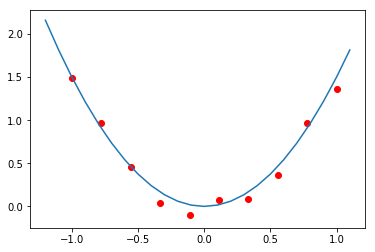

In [3]:
# plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '*')
x = np.arange(-1.2, 1.2, 0.1)
y = 1.5*x**2
plt.plot(x,y)
plt.scatter(correct_data["x"], correct_data["y"], color="red")

# plt.ylim(-2,2)
plt.show()

# Q3. 2で生成したデータに対して、最急降下法を用いて<br>最小二乗誤差を最小化するように y = ax^{2} のパラメータ a を<br>決定するプログラムを書き、実行せよ。<br><br>また、その際に用いた式を書け。<br>「横軸をイテレーション、縦軸を誤差としたグラフ」と、<br>「横軸を $x$ 縦軸を $y$ として、データを点で、<br>パラメータ調整後の関数の出力を曲線で描画したグラフ」を描け。

# A.3

In [4]:
# Q2で求めたデータ
correct_data

,y,x
0,1.495463,-1.000000
1,0.969832,-0.777778
2,0.460667,-0.555556
3,0.043150,-0.333333
4,-0.101032,-0.111111
5,0.078673,0.111111
6,0.087678,0.333333
7,0.364699,0.555556
8,0.966679,0.777778
9,1.363597,1.000000


In [5]:
# 予測式  
# $
# \hat y = ax^2
# $

# 誤差関数  (パラメータaをwと置く)  
# $
# E(w)  = \frac{1}{2}\sum_{i}((wx^2_i) - y_i)^2  
# $

# 誤差関数の展開  
# $
# E(w) = \frac{1}{2}\sum_{i}(w^2x^4_i - 2wx^2_iy_i + y_i^2)  
# $

# $
# E(w) = \frac{1}{2}\sum_{i}\{x^2_i(w^2x^2_i) - x_i(2wx_iy_i) + y_i^2\}  
# $


# 最急降下法  
# $
# w^(k+1) = w(k) - α\frac{\delta \frac{1}{2}\sum_{i}((wx^2_i) - y_i)^2}{\delta w}
# $

# **結論：最急降下法を用いて最小二乗誤差を最小化式**  
# $
# パラメータ更新
# w^(k+1) = w^(k) - α\frac{\delta \frac{1}{2}\sum_{i}\{x^2_i(w^2x^2_i) - x_i(2wx_iy_i) + y_i^2\}}{\delta w}
# $

# ただ、パラメータの更新式はもっと簡単にできる。  
# 上記展開前の誤差関数を微分する。  
# $
# E(w)  = \frac{\delta \frac{1}{2}\sum_{i}((wx^2_i) - y_i)^2}{\delta w}   
# $

# $
# w^(k+1) = w^(k) - α\sum_{i}(wx^2_i - y_i)*1
# $

<img src="images/delta_2.png">

### 上記更新式を使ってパラメータの更新。
### 更新されたパラメータを使い誤差関数の値を求める

**試しに、x[0]の値とy[0]の値だけで更新させてみる。**

In [6]:
y = correct_data["y"]  # データy
x = correct_data["x"]  # データx
α = 0.005  # ハイパーパラメータ
w = 1 # 初期値のパラメータw

for _ in range(10):  # データ分更新
    w = w - α*(w*x[0] - y[0])*1
    error = 0.5 * ((w*x[0]**2) - y[0])**2
    print("error: ", error)
    
# 誤差が小さくなっていることが分かる

error:  0.11663776690418734
error:  0.11065988701908698
error:  0.1048105431943772
error:  0.09909196632559454
error:  0.09350641438461103
error:  0.08805617271463237
error:  0.08274355432827153
error:  0.07757090020872848
error:  0.0725405796141089
error:  0.06765499038491236


In [7]:
# 全てのデータを使い、誤差の平均が0 ~ 0.01になるパラメータを見つける
allowable_error = None  # 許容誤差
average_error = []
average_w = []

for _ in range(100):  # 100回更新
    w = w - α*(w*x - y)*1
    error = 0.5 * ((w*x**2) - y)**2
    allowable_error = sum(error)/len(x)  # データ全ての二乗誤差の平均値を求めている
    
    average_error.append(allowable_error)  # 二乗誤差平均をlistへ保存
    average_w.append(sum(w)/len(w))  # 更新パラメータをlistへ保存
    if allowable_error < 0.015:
        print("誤差の平均値が許容誤差範囲内になりました。")
        print("誤差平均値：", sum(error)/len(x))
        print("全てのパラメータ：", w)
        break
update_error = error        
update_w = w        

誤差の平均値が許容誤差範囲内になりました。
誤差平均値： 0.01470283515963131
全てのパラメータ： 0    1.234396
1    1.202506
2    1.171528
3    1.144477
4    1.128591
5    1.125757
6    1.116158
7    1.117249
8    1.131156
9    1.136894
dtype: float64


# 横軸をイテレーション、縦軸を誤差としたグラフ

In [8]:
average_error  # 二乗誤差の平均値を更新される度にlistへ保存しておいたもの

[0.01897775779125184,
 0.018310607154715074,
 0.017661791145853402,
 0.01703159505953917,
 0.01642030757860804,
 0.015828220809151573,
 0.015255630316176114,
 0.01470283515963131]

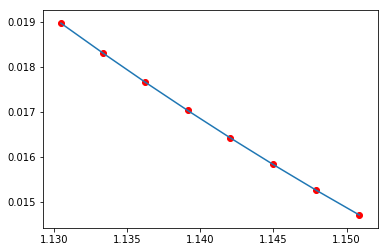

In [11]:
# wは上記でパラメータ調整された値

plt.plot(average_w,average_error)
plt.scatter(average_w,average_error, color="red")

plt.show()

# 以下のグラフより、パラメータwが更新される度に誤差が小さくなっている様子が分かる

# 横軸を  𝑥  縦軸を  𝑦  として、データを点で、<br>パラメータ調整後の関数の出力を曲線で描画したグラフ

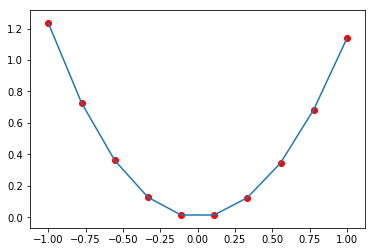

In [10]:
# wは上記でパラメータ調整された値
y = update_w*x**2
plt.plot(x,y)
plt.scatter(x, y, color="red")

plt.show()